In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [7]:
df=pd.read_csv('Border_Crossing_Entry_Data.csv')

In [8]:
df.head(10)

,Port Name,State,Port Code,Border,Date,Measure,Value
0,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Personal Vehicle Passengers,1414
1,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Personal Vehicles,763
2,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Truck Containers Empty,412
3,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Truck Containers Full,122
4,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Trucks,545
5,Alexandria Bay,NY,708,US-Canada Border,2/1/2020 00:00,Bus Passengers,1174
6,Alexandria Bay,NY,708,US-Canada Border,2/1/2020 00:00,Buses,36
7,Alexandria Bay,NY,708,US-Canada Border,2/1/2020 00:00,Personal Vehicle Passengers,68630
8,Alexandria Bay,NY,708,US-Canada Border,2/1/2020 00:00,Personal Vehicles,31696
9,Alexandria Bay,NY,708,US-Canada Border,2/1/2020 00:00,Truck Containers Empty,1875


In [10]:
df.isnull().any()

Port Name    False
State        False
Port Code    False
Border       False
Date         False
Measure      False
Value        False
dtype: bool

In [6]:
df['Measure'].unique()

array(['Personal Vehicle Passengers', 'Personal Vehicles',
       'Truck Containers Empty', 'Truck Containers Full', 'Trucks',
       'Bus Passengers', 'Buses', 'Pedestrians', 'Rail Containers Empty',
       'Rail Containers Full', 'Train Passengers', 'Trains'], dtype=object)

In [11]:
df_MOT=df.groupby('Measure')['Value'].sum().sort_values(ascending=False)

In [12]:
df_MOT

Measure
Personal Vehicle Passengers    5629526756
Personal Vehicles              2651535415
Pedestrians                    1090067964
Trucks                          264731943
Truck Containers Full           185463194
Bus Passengers                  146027374
Truck Containers Empty           67036035
Rail Containers Full             40492650
Rail Containers Empty            22386399
Buses                             8754394
Train Passengers                  6472717
Trains                             933270
Name: Value, dtype: int64

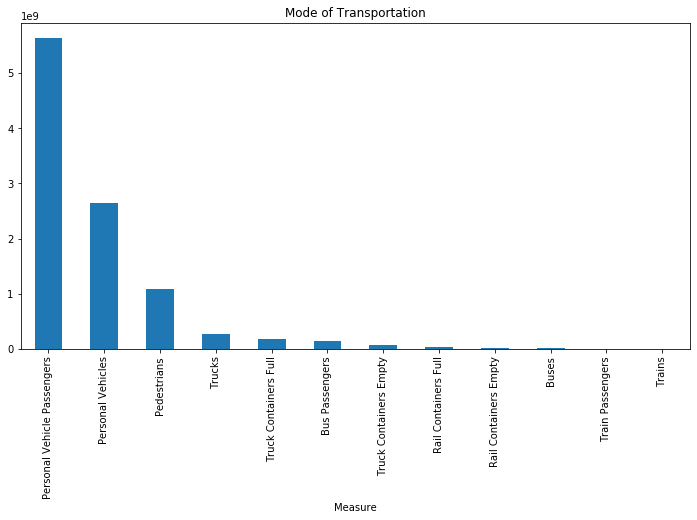

In [45]:
plt.figure(figsize=(12,6))
df_MOT.plot(kind='bar',title='Mode of Transportation')

In [38]:
df_border=df.groupby('Border')['Value'].sum().sort_values()

In [39]:
df_border

Border
US-Canada Border    2776127401
US-Mexico Border    7337300710
Name: Value, dtype: int64

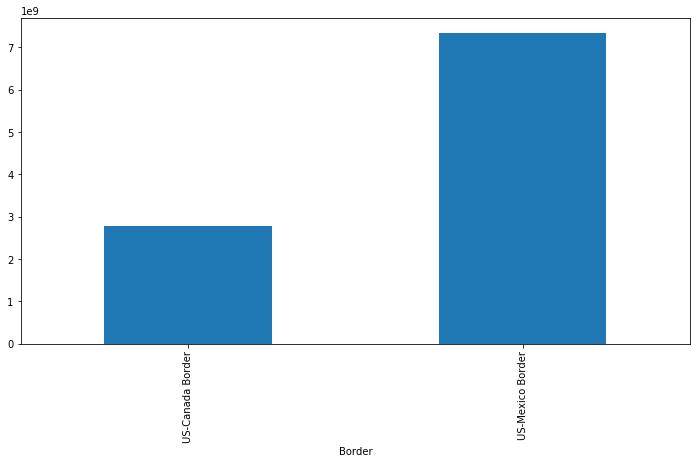

In [42]:
plt.figure(figsize=(12,6))
df_border.plot(kind='bar')

In [51]:
df_state=df.groupby('State')['Value'].sum().sort_values(ascending=False)

In [52]:
df_state

State
TX    3747879529
CA    2602572970
AZ     918287879
NY     854042599
MI     775410321
WA     521397911
ME     236781464
VT     118116868
MN      99126985
ND      78600964
NM      68560332
MT      56139436
ID      21833390
AK      14676856
OH           607
Name: Value, dtype: int64

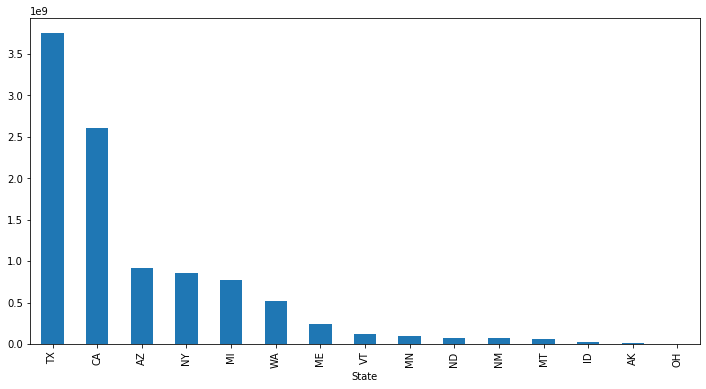

In [53]:
plt.figure(figsize=(12,6))
df_state.plot(kind='bar')

In [116]:
df_time=pd.read_csv('Border_Crossing_Entry_Data.csv',index_col='Date',parse_dates=True)

In [117]:
df_time = df_time.sort_index(ascending=True, axis=0)

In [118]:
df_time_yearly=df_time.resample(rule='M')['Value'].sum()

In [119]:
df_time_yearly=pd.DataFrame(df_time_yearly)

In [120]:
df_time_yearly.index

DatetimeIndex(['1996-01-31', '1996-02-29', '1996-03-31', '1996-04-30',
               '1996-05-31', '1996-06-30', '1996-07-31', '1996-08-31',
               '1996-09-30', '1996-10-31',
               ...
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
               '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31',
               '2020-01-31', '2020-02-29'],
              dtype='datetime64[ns]', name='Date', length=290, freq='M')

In [121]:
df_time_yearly=df_time_yearly.truncate(after='2019-12-31')

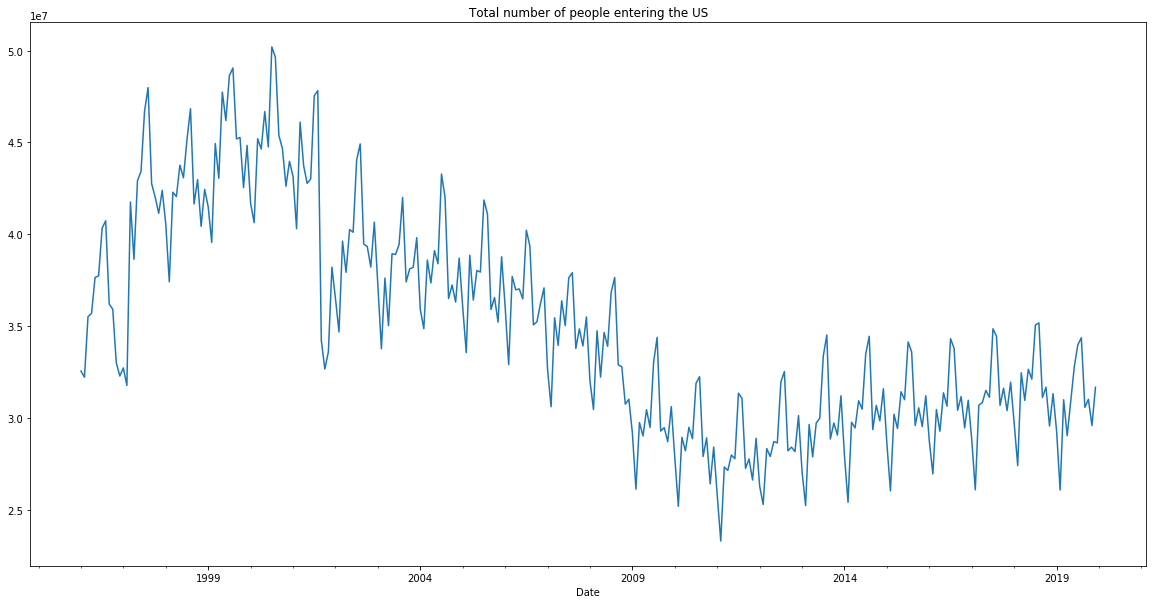

In [150]:
df_time_yearly['Value'] = df_time_yearly['Value'].astype(int)
plt.figure(figsize=(20,10))
df_time_yearly['Value'].plot(kind='line',title='Total number of people entering the US')


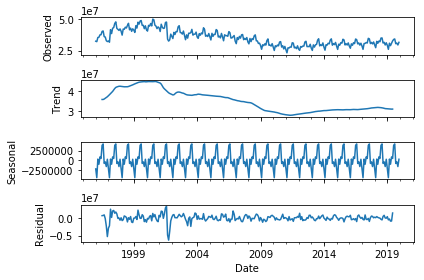

In [125]:
from statsmodels.tsa.seasonal import seasonal_decompose
results=seasonal_decompose(df_time_yearly['Value'])
results.plot();

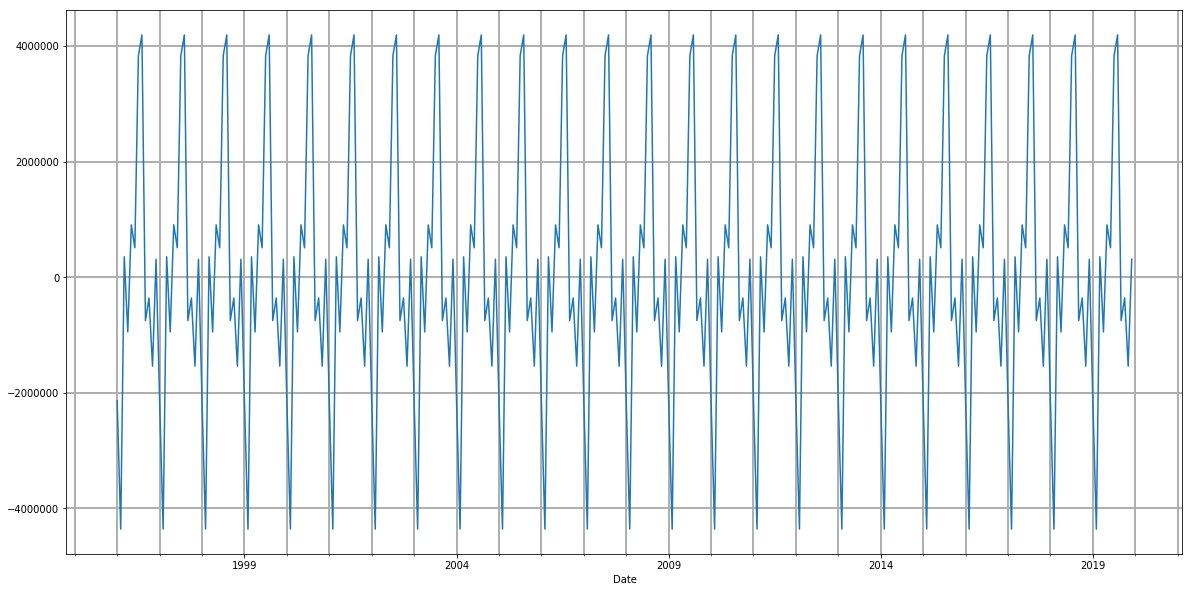

In [159]:
results.seasonal.plot(figsize=(20,10))

plt.grid(which='both', linestyle='-', linewidth=2)

In [127]:
from pmdarima import auto_arima

In [128]:
Orders=auto_arima(df_time_yearly['Value'],seasonal=True,m=12,error_action='ignore')
Orders.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  288
Model:             SARIMAX(0, 1, 1)x(2, 0, 2, 12)   Log Likelihood               -4567.641
Date:                            Sat, 02 May 2020   AIC                           9149.283
Time:                                    17:36:56   BIC                           9174.899
Sample:                                         0   HQIC                          9159.549
                                            - 288                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -2.221e+04   3.93e+04     -0.565      0.572   -9.92e+04    5.48e+04
ma.L1         -0.0344      0.136     -0.252      0.801      -0.302       0.233
ar.S.L12       1.5589      0.275      5.662      0.000       1.019       2.099
ar.S.L24      -0.5706      0.267     -2.140      0.032      -1.093      -0.048
ma.S.L12      -1.3884      0.303     -4.584      0.000      -1.982      -0.795
ma.S.L24       0.4509      0.257      1.756      0.079      -0.053       0.954
sigma2      6.837e+12      0.001   1.16e+16      0.000    6.84e+12    6.84e+12
===================================================================================
Ljung-Box (Q):                      333.02   Jarque-Bera (JB):              1069.12
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.11   Skew:                            -1.06
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.64e+30. Standard errors may be unstable.
"""

In [130]:
Train=df_time_yearly.iloc[0:277]
Test=df_time_yearly.iloc[277:]

In [131]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [132]:
Model=SARIMAX(Train['Value'],order=(0,1,1),seasonal_order=(2,0,2,12),enforce_invertibility=False).fit()

In [133]:
Model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                              Value   No. Observations:                  277
Model:             SARIMAX(0, 1, 1)x(2, 0, 2, 12)   Log Likelihood               -4398.667
Date:                            Sat, 02 May 2020   AIC                           8809.334
Time:                                    17:42:54   BIC                           8831.056
Sample:                                01-31-1996   HQIC                          8818.051
                                     - 01-31-2019                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0790      0.080     -0.984      0.325      -0.236       0.078
ar.S.L12       0.4080      0.411      0.993      0.321      -0.397       1.213
ar.S.L24       0.4889      0.367      1.332      0.183      -0.230       1.208
ma.S.L12      -0.1814      0.409     -0.443      0.658      -0.983       0.621
ma.S.L24      -0.4640      0.278     -1.668      0.095      -1.009       0.081
sigma2      6.895e+12   7.94e-14   8.68e+25      0.000    6.89e+12    6.89e+12
===================================================================================
Ljung-Box (Q):                      350.20   Jarque-Bera (JB):              1189.14
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.09   Skew:                            -1.37
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.12e+41. Standard errors may be unstable.
"""

In [137]:
predictions=Model.predict(start=len(Train),end=len(Train)+len(Test)-1,typ='levels').rename('Predictions')

In [138]:
predictions

2019-02-28    2.772764e+07
2019-03-31    3.082426e+07
2019-04-30    3.009073e+07
2019-05-31    3.122844e+07
2019-06-30    3.088393e+07
2019-07-31    3.319394e+07
2019-08-31    3.325884e+07
2019-09-30    3.028475e+07
2019-10-31    3.078422e+07
2019-11-30    2.974487e+07
2019-12-31    3.097164e+07
Freq: M, Name: Predictions, dtype: float64

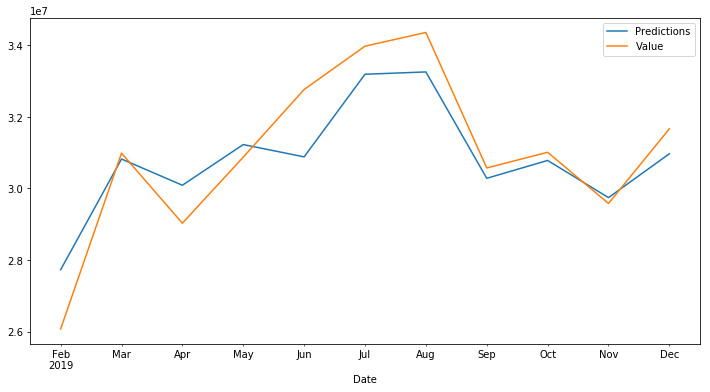

In [139]:
predictions.plot(figsize=(12,6),legend=True)
Test['Value'].plot(legend=True)



In [140]:
from statsmodels.tools.eval_measures import rmse

In [141]:
rmse(Test['Value'],predictions)

955707.7680373539

In [162]:
a=predictions.describe()
a.astype(int)

count          11
mean     30817570
std       1526943
min      27727643
25%      30187739
50%      30824261
75%      31100041
max      33258835
Name: Predictions, dtype: int64

In [164]:
b=Test['Value'].describe()
b.astype(int)

count          11
mean     30991975
std       2326422
min      26072319
25%      30078024
50%      30987561
75%      32218084
max      34362143
Name: Value, dtype: int64

In [144]:
predictions_F=Model.predict(start=len(df_time_yearly)-1,end=len(df_time_yearly)+12,typ='levels').rename('Final_Predictions')

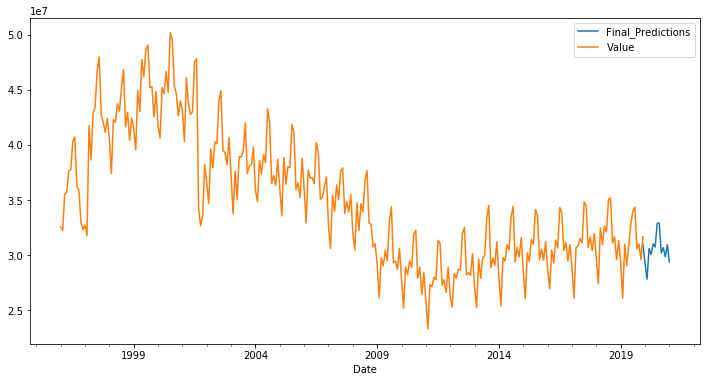

In [167]:

predictions_F.plot(figsize=(12,6),legend=True)

df_time_yearly['Value'].plot(legend=True)


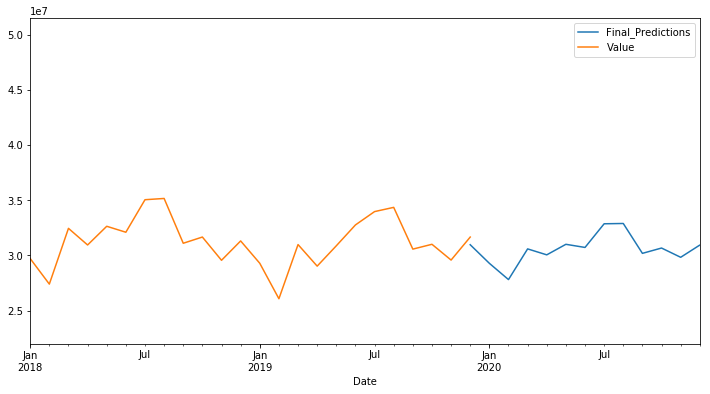

In [148]:
predictions_F.plot(figsize=(12,6),legend=True,xlim=('2018-01-01','2020-12-30'))
df_time_yearly['Value'].plot(legend=True)
